# **IDS575: Machine Learning and Statistical Methods**
## [Quiz #03 - Logistic Regression and Binary Classification]



## Import Libraries
* See various conventions and acronyms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load the data into a DataFrame
* Read directly from a csv (excel-like) data.

In [ ]:
FraudDataset = pd.read_csv('fraud.csv')
print(type(FraudDataset))
print(FraudDataset.keys())

<class 'pandas.core.frame.DataFrame'>
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## Verify basic data statistics
* Count the number of features. (i.e., attributes)
* Count the number of examples. (i.e., instances and labels)
* Unfortunately we don't know what each feature means due to privacy concerns.
* Class variable: 0 (standard) / 1 (fradulent)


In [ ]:
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
  
printBasicStats(FraudDataset)
print(FraudDataset)

- # of features = 30
- # of examples = 284807
            Time         V1         V2        V3        V4  ...       V26  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155  ... -0.189115   
1            0.0   1.191857   0.266151  0.166480  0.448154  ...  0.125895   
2            1.0  -1.358354  -1.340163  1.773209  0.379780  ... -0.139097   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291  ... -0.221929   
4            2.0  -1.158233   0.877737  1.548718  0.403034  ...  0.502292   
...          ...        ...        ...       ...       ...  ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656  ...  0.250034   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  ... -0.395255   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  ... -0.087371   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799  ...  0.546668   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271  ... -0.818267   

             V27       V28  A

## Data inspection
* See the label imbalance.
* Measure the baseline accuracy.


In [ ]:
Counts = FraudDataset['Class'].value_counts()
print(Counts)

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
pd.set_option('display.max_columns', 10)
print(FraudDataset.describe(exclude=None))

Counts = FraudDataset['Class'].value_counts()
print(Counts)

BaseLineAcc = Counts[0]/(Counts[0] + Counts[1])
print(BaseLineAcc)


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758743e-12 -8.252298e-13 -9.636929e-13  8.316157e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

       ...           V26           V27           V28         Amount  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   ... -5.615260e-13  3.332112e-12 -3.518886e-12      88.349619   
std    ...  4.822270e-01  4.036325e-01  3.300833e-01     250.12010

## Data inspection Part II.
* Measure the correlation.
* Let's draw heatmap as an intuitive visualization.


            Time            V1            V2            V3            V4  ...  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01  ...   
V1      0.117396  1.000000e+00  3.777386e-12 -2.119585e-12 -1.724017e-13  ...   
V2     -0.010593  3.777386e-12  1.000000e+00  2.326821e-12 -2.314711e-12  ...   
V3     -0.419618 -2.119585e-12  2.326821e-12  1.000000e+00  2.036710e-13  ...   
V4     -0.105260 -1.724017e-13 -2.314711e-12  2.036710e-13  1.000000e+00  ...   
V5      0.173072 -3.472870e-12 -1.832637e-12 -4.031527e-12 -2.549916e-13  ...   
V6     -0.063016 -1.306592e-13  9.439633e-13 -1.582965e-13  1.083580e-12  ...   
V7      0.084714 -1.127393e-13  5.403061e-12  3.404521e-12  8.130086e-13  ...   
V8     -0.036949  2.115132e-12  2.153414e-14 -1.271766e-12  7.338233e-13  ...   
V9     -0.008660  3.081639e-14  3.239499e-13 -6.819934e-13 -7.138427e-13  ...   
V10     0.030617 -2.615209e-12  1.463139e-12 -1.611234e-12 -1.938801e-12  ...   
V11    -0.247689  1.866050e-

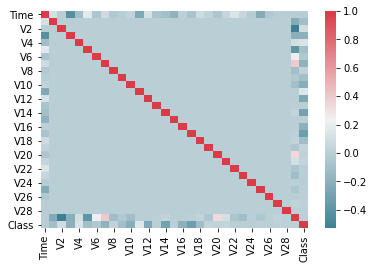

In [ ]:
print(FraudDataset.corr())

import seaborn as sns
sns.heatmap(FraudDataset.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Data split
* Must split into train and test data but with respect to the class distribution.


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

def splitTrainTest(df, size):
  split = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=0)

  # For each pair of train and test indices,
  X = df.drop('Class', axis=1)
  y = df.Class  
  for trainIndexes, testIndexes in split.split(X, y):
    X_train, y_train = X.iloc[trainIndexes], y.iloc[trainIndexes]
    X_test, y_test = X.iloc[testIndexes], y.iloc[testIndexes]

  return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = splitTrainTest(FraudDataset, 0.2)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


## Logistic Regression 
* Train the logistic regression.
* Train again with normalization.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

def doLogisticRegression(X, y, normalize=False):
  # If normalize option is enabled,
  if normalize:
    # For each feature (indexed by j as usual)
    for j in X.columns:
      # Subtract its column mean and update the value.
      X[j] -= X[j].mean()

      # Divide by its standard deviation and update the value.
      X[j] /= X[j].std()

  # Instanciate an object from Logistic Regression class.
  lr = LogisticRegression()

  # Perform training and prediction.
  lr.fit(X, y)
  y_pred = lr.predict(X)
      
  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr

TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train, normalize=True)
print(TrainAcc)
print(TrainConf)

0.9992143781957032
[[227418     33]
 [   146    248]]


In [ ]:
y_test_pred = LR.predict(X_test)
TestAcc, TestConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
print(TestAcc)
print(TestConf)


0.9979986657771848
[[56848    16]
 [   98     0]]


# Programming Assignment (PA)
*   Implement logistic()
*   Implement logLikelihood()
*   Implement predict()
*   Implement miniBatchGradientDescent()
*   Play with testYourCode() that compares your implementations agaisnt scikit-learn's results.
*   Note that your log-likelihood must increase over epoch as you update the model parameter theta toward its maximum.

In [ ]:
class MyLogisticRegression:
  # Randomly initialize the parameter vector.
  theta = None

  def logistic(self, z):
    # Return the sigmoid function value.
    ##############################################################
    # TO-DO: Complete the evaluation of logistic function given z.
    logisticValue = 
    ##############################################################
    return logisticValue

  def logLikelihood(self, X, y):
    # Compute the log-likelihood hood of all training examples.
    # X: (m x (n+1)) data matrix
    # y: (m x 1) output vector    

    # If theta parameter has not trained yet,
    if not isinstance(self.theta, np.ndarray):
      return 0.0

    # Compute the linear hypothesis given individual examples (as a whole).
    h_theta = self.logistic(np.dot(X, self.theta))

    # Evalaute the two terms in the log-likelihood.    
    #################################################################
    # TO-DO: Compute the two terms in the log-likelihood of the data.
    probability1 = 
    probability0 = 
    #################################################################

    # Return the average of the log-likelihood
    m = X.shape[0]
    return (1.0/m) * np.sum(probability1 + probability0) 

  def fit(self, X, y, alpha=0.01, epoch=50):
    # Extract the data matrix and output vector as a numpy array from the data frame.
    # Note that we append a column of 1 in the X for the intercept.
    X = np.concatenate((np.array(X), np.ones((X.shape[0], 1), dtype=np.float64)), axis=1)
    y = np.array(y)  

    # Run mini-batch gradient descent.
    self.miniBatchGradientDescent(X, y, alpha, epoch)

  def predict(self, X):
    # Extract the data matrix and output vector as a numpy array from the data frame.
    # Note that we append a column of 1 in the X for the intercept.
    X = np.concatenate((np.array(X), np.ones((X.shape[0], 1), dtype=np.float64)), axis=1)

    # Perfrom a prediction only after a training happens.
    if isinstance(self.theta, np.ndarray):
      y_pred = self.logistic(X.dot(self.theta))
      ####################################################################################
      # TO-DO: Given the predicted probability value, decide your class prediction 1 or 0.
      y_pred_class = 
      ####################################################################################
      return y_pred_class
    return None

  def miniBatchGradientDescent(self, X, y, alpha, epoch, batch_size=100):    
    (m, n) = X.shape
  
    # Randomly initialize our parameter vector. (DO NOT CHANGE THIS PART!)
    # Note that n here indicates (n+1) because X is already appended by the intercept term.
    np.random.seed(2) 
    self.theta = 0.1*(np.random.rand(n) - 0.5)
    print('L2-norm of the initial theta = %.4f' % np.linalg.norm(self.theta, 2))
    
    # Start iterations
    for iter in range(epoch):
      # Print out the progress report for every 1000 iteration.
      if (iter % 5) == 0:
        print('+ currently at %d epoch...' % iter)   
        print('  - log-likelihood = %.4f' % self.logLikelihood(X, y))

      # Create a list of shuffled indexes for iterating training examples.     
      indexes = np.arange(m)
      np.random.shuffle(indexes)

      # For each mini-batch,
      for i in range(0, m - batch_size + 1, batch_size):
        # Extract the current batch of indexes and corresponding data and outputs.
        indexSlice = indexes[i:i+batch_size]        
        X_batch = X[indexSlice, :]
        y_batch = y[indexSlice]

        # For each feature
        for j in np.arange(n):
          ####################################################################################
          # TO-DO: Perform like a batch gradient desceint within the current mini-batch.
          # Note that your algorithm must update self.theta[j].
                   
          ####################################################################################
          
  
def doMyLogisticRegression(X, y, alpha, epoch, normalize=False):
  # If normalize option is enabled,
  if normalize:
    # For each feature (indexed by j as usual)
    for j in X.columns:
      # Subtract its column mean and update the value.
      X[j] -= X[j].mean()

      # Divide by its standard deviation and update the value.
      X[j] /= X[j].std()

  # Instanciate an object from Logistic Regression class.
  lr = MyLogisticRegression()

  # Perform training and prediction.
  lr.fit(X, y, alpha, epoch,)
  y_pred = lr.predict(X)
      
  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred), confusion_matrix(y, y_pred), lr





    

In [ ]:
def testYourCode(X_train, y_train, X_test, y_test, alpha, epoch):
  # Test the code with scikit-learn.
  trainAcc, trainConf, lr = doLogisticRegression(X_train, y_train, normalize=True)
  y_test_pred = lr.predict(X_test)
  testAcc, testConf = accuracy_score(y_test, y_test_pred), confusion_matrix(y_test, y_test_pred)
  print("Scikit's training/test accuracies = %.4f / %.4f" % (trainAcc, testAcc))
  print("Scikit's training/test confusion matrix\n %s\n %s" % (trainConf, testConf))
  theta = np.append(lr.coef_[0], lr.intercept_)
  print(theta)

  # Test the code with your own version.
  myTrainAcc, myTrainConf, myLR = doMyLogisticRegression(X_train, y_train, alpha, epoch, normalize=True)
  my_y_test_pred = myLR.predict(X_test)
  myTestAcc, myTestConf = accuracy_score(y_test, my_y_test_pred), confusion_matrix(y_test, my_y_test_pred)
  print("My training/test accuracies = %.4f / %.4f" % (myTrainAcc, myTestAcc))
  print("My training/test confusion matrix\n %s\n %s" % (myTrainConf, myTestConf))
  print(myLR.theta)

testYourCode(X_train, y_train, X_test, y_test, 0.05, 100)


Scikit's training/test accuracies = 0.9992 / 0.9980
Scikit's training/test confusion matrix
 [[227418     33]
 [   146    248]]
 [[56848    16]
 [   98     0]]
[-1.66767445e-01  1.68357145e-01  2.62997389e-02  3.90900216e-02
  9.42470155e-01  1.49724556e-01 -1.24410960e-01 -1.49150632e-01
 -2.04996491e-01 -2.87178956e-01 -8.38403194e-01 -5.15063282e-03
  5.01854078e-02 -2.38173041e-01 -5.53811407e-01 -1.04186166e-01
 -2.22980387e-01  7.10037273e-03  7.00394204e-03  8.23866791e-02
 -3.54761664e-01  2.40133695e-01  4.12819490e-01 -5.76494056e-02
  5.24238535e-02  2.44609365e-03 -2.80842684e-02 -2.87220019e-01
 -8.59162227e-02  2.58069755e-01 -8.63718232e+00]
L2-norm of the initial theta = 0.1434
+ currently at 0 epoch...
  - log-likelihood = -0.6936
+ currently at 5 epoch...
  - log-likelihood = -0.0051
+ currently at 10 epoch...
  - log-likelihood = -0.0043
+ currently at 15 epoch...
  - log-likelihood = -0.0041
+ currently at 20 epoch...
  - log-likelihood = -0.0040
+ currently at 25 e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
